<a href="https://colab.research.google.com/github/KWANGJAEIM/AI_project/blob/main/CNN__scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**초기 가중치 설정 (weight initialization)**


초기값 설정은 중요함 or not 기울기 소실 문제나 표현력의 한계 etc..  
딥러닝 ->+ non-convex,  local minimum에 수렴 가능성 

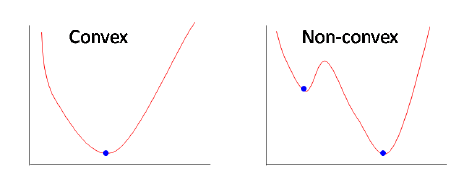


잘못된 초기값 설정 예 

1) 초기값을 모두 0으로 설정

 0으로 가중치를 초기화 한다면 모든 뉴런들이 같은 값  
->  역전파에서 가중치 Update 동일해짐 -> 여러 층으로 나누는 의미를 상쇄

2) 활성화 함수로 sigmoid 사용시 정규 분포 사용

sigmoid함수-> 미분값이 소실되는 문제가 발생  
 이 경우에 평균 0이고 표준편차가 1인 정규분포를 따르도록 가중치를 랜덤하게 초기화 한다고 가정하자.gradien vanishing이 경우에는 표준편차가 크기 때문에 학습을 반복할 수록 가중치 값들이 0,1 로 치우치는 문제 발생한다.(Gradient Vanishing) 이 경우 물론 Activation Function을 바꿈으로써 해결 할 수도 있겠지만, 가중치 초기화를 잘 설정함으로써도 어느정도 해결할 수 있다.

3) 2의 case에서 표준편차를 줄였을 경우

2의 문제를 확인하고 표준편차가 커 |x|값이 커지면서 기울기가 소실되는 문제를 확인했기 때문에, 표준편차를 줄여서 |x|값을 줄이려는 생각을 가지고 표준편차를 0.01로 설정한다고 가정하자. 이 경우에는 또다른 문제가 발생한다.representation
이렇게 표준편차를 적게 하면 층이 깊어질 수록 가중치 값들이 중간 값인 0.5 부근에 몰리는 문제를 확인할 수 있을 것이다.

따라서 이렇게 가중치를 설정하는 것만으로도 학습의 큰영향을 끼친다는 것을 확인할 수 있었다. 그렇다면 더 나은 학습을 위해 가중치를 초기화하는 여러 방법들에 대해서 알아보도록 한다.

1. LeCun Initialization
 
LeCun은 LeNet의 창시자이며, CNN을 세상에 도입   
정규분포를 따르는 방법과 균등분포를 따르는 두가지 방법에 대해서 소개
*(LeCun 98, Efficient Backprop)*

LeCun Normal Initialization
W∼N(0,Var(W))
Var(W)=1nin−−−√
(nin : 이전 layer(input)의 노드 수)

LeCun Uniform Initialization
W∼U(−1nin−−−√,  +1nin−−−√)
(nin : 이전 layer(input)의 노드 수)

2. Xavier Initialization

Xavier Initialization 혹은 Glorot Initialization라고도 불리는 초기화 방법은 이전 노드와 다음 노드의 개수에 의존하는 방법이다. Uniform 분포를 따르는 방법과 Normal분포를 따르는 두가지 방법이 사용된다.(Glorot & Bengio, AISTATS 2010)

구조는 LeCun의 초기화 방법과 유사하지만 다음 층의 노드 수도 사용하고, 많은 연구를 통해 가장 최적화된 상수값 또한 찾아냈다.

Xavier Normal Initialization
W∼N(0,Var(W))
Var(W)=2nin+nout−−−−−−−−−√
(nin : 이전 layer(input)의 노드 수, nout : 다음 layer의 노드 수)

Xavier Uniform Initialization
W∼U(−6nin+nout−−−−−−−−−√,  +6nin+nout−−−−−−−−−√)
(nin : 이전 layer(input)의 노드 수, nout : 다음 layer의 노드 수)

Xaiver함수는 비선형함수(ex. sigmoid, tanh)에서 효과적인 결과를 보여준다. 하지만 ReLU함수에서 사용 시 출력 값이 0으로 수렴하게 되는 현상을 확인 할 수 있다. 따라서 ReLU함수에는 또 다른 초기화 방법을 사용해야 한다.
3.He Initialization

ReLU를 활성화 함수로 사용 시 Xavier 초기값 설정이 비효율적인 결과를 보이는 것을 확인했는데, 이런 경우 사용하는 초기화 방법을 He initialization이라고 한다. 이 방법 또한 정규분포와 균등분포 두가지 방법이 사용된다.(He et al. ,2015)

He Normal Initialization
W∼N(0,Var(W))
Var(W)=2nin−−−√
(nin : 이전 layer(input)의 노드 수)

He Uniform Initialization
W∼U(−6nin−−−√,  +6nin−−−√)
(nin : 이전 layer(input)의 노드 수)

Bias 초기화
가중치 초기화 뿐만 아니라 편향(bias) 초기값 또한 초기값 설정 또한 중요하다.
보통의 경우에는 Bias는 0으로 초기화 하는 것이 일반적이다. ReLU의 경우 0.01과 같은 작은 값으로 b를 초기화 하는 것이 좋다는 보고도 있지만 모든 경우는 아니라 일반적으로는 0으로 초기화 하는 것이 효율적이다.

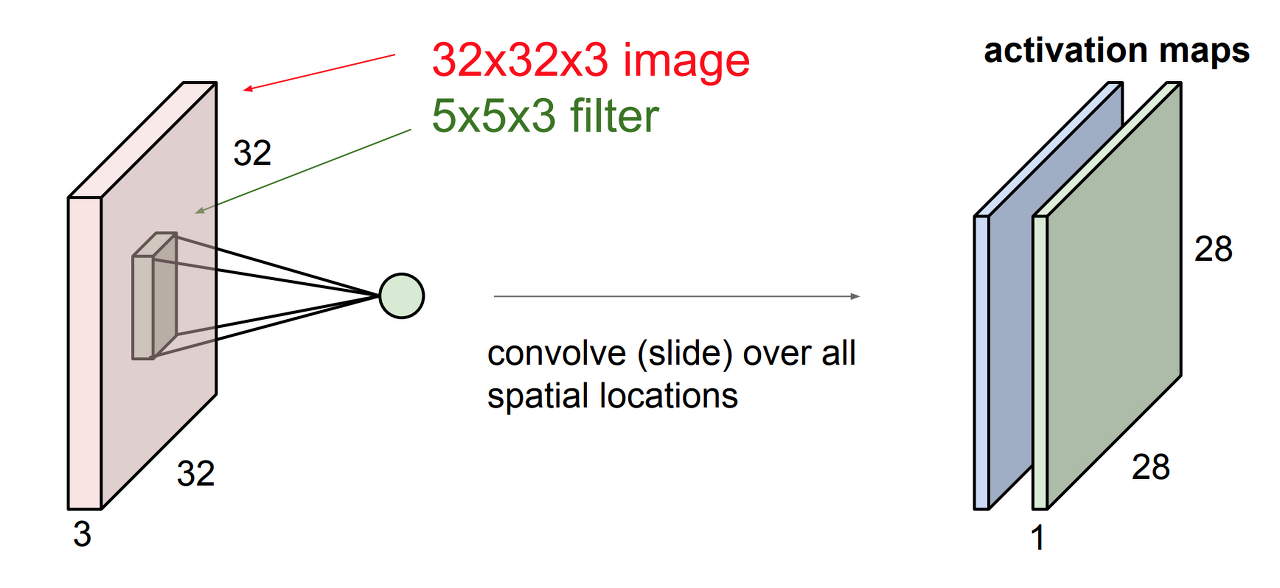
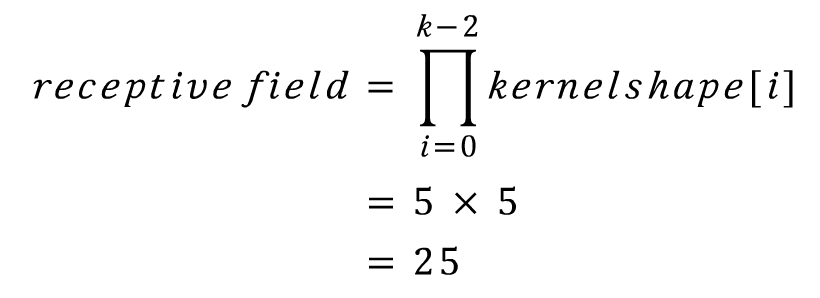

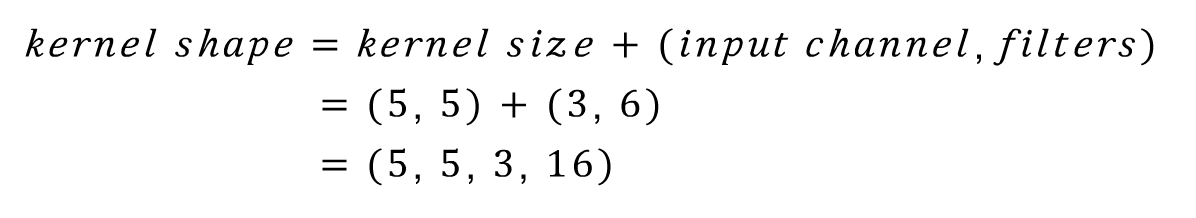

In [ ]:
import numpy as np

class Conv:
    
    def __init__(self, num_filters, filter_H, filter_W, stride):
        self.num_filters = num_filters
        self.filter_H = filter_H
        self.filter_W = filter_W
        self.stride = stride 
        self.filters = np.random.randn(num_filters, filter_H , filter_W)/9

    #표준편차가 1/3인 (분산 =1/9 )인 정규분포로 가중치 초기화 
    #filter size =3 -> 분산 = sqrt(2/(fan_in+ fan_out)) -> Xabier glorot normal 
    #https://yeomko.tistory.com/40

    def iterate_regions(self, image):
       
        #generates all possible 3*3 image regions using valid padding
        
        h,w = image.shape
        

        for i in range(h - self.filter_H):  #filter size가 3이니까! 
            for j in range(w - self.filter_W):
                im_region = image[i:(i+3), j:(j+3)]
                if i% self.stride == 0  and j % self.stride == 0:
                    yield im_region, i, j
                #이미지가 10*10이면 7*7 꼴의 행렬..?
                #아래의 순전파에서 Conv 연산을 위해 칸 나눠준거


    def forward(self, input):
        self.last_input = input
        h,w = input.shape
        
        output = np.zeros((int((h - self.filter_H)/ self.stride)+1,int((w - self.filter_W)/self.stride)+1, self.num_filters))
        
        for im_regions, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(im_regions * self.filters, axis=(1,2))
        return output
 
 #convolution 연산을 수행 

    def backprop(self, d_l_d_out, learn_rate):
        '''
        Performs a backward pass of the conv layer.
        - d_L_d_out is the loss gradient for this layer's outputs.
        - learn_rate is a float.
        '''
        d_l_d_filters = np.zeros(self.filters.shape)

        for im_region, i, j in self.iterate_regions(self.last_input):
            for f in range(self.num_filters):
                d_l_d_filters[f] += d_l_d_out[i,j,f] * im_region

        #fitter에 대한 가중치를 업데이트 해줌 

        self.filters -= learn_rate * d_l_d_filters

        return None

In [ ]:
class MaxPool:
    def iterate_regions(self, image):
        h, w, _ = image.shape
        
        new_h = h // 2
        new_w = w // 2
        
        for i in range(new_h):
            for j in range(new_w):
                im_region = image[(i*2):(i*2+2), (j*2):(j*2+2)]
                yield im_region, i, j
                
    def forward(self, input):
    
        self.last_input = input
       

        h, w, num_filters = input.shape
        output = np.zeros((h//2, w//2, num_filters))
        
        for im_region, i, j in self.iterate_regions(input):
            output[i,j] = np.amax(im_region,axis=(0,1))
            
        return output
    
    def backprop(self, d_l_d_out):

        d_l_d_input = np.zeros(self.last_input.shape)

        for im_region, i, j in self.iterate_regions(self.last_input):
            h, w, f = im_region.shape
            amax = np.amax(im_region, axis=(0,1))

            for i2 in range(h):
                for j2 in range(w):
                    for f2 in range(f):
                        #if the pixel was the max value, copy the gradient to it
                        if(im_region[i2,j2,f2] == amax[f2]):
                            d_l_d_input[i*2+i2, j*2+j2 ,f2] = d_l_d_out[i, j, f2]
                            break;
        return d_l_d_input

In [ ]:
class AveragePool:
    def iterate_regions(self, image):
        h, w, _ = image.shape
        
        new_h = h // 2
        new_w = w // 2
        

        for i in range(new_h):
            for j in range(new_w):
                im_region = image[(i*2):(i*2+2), (j*2):(j*2+2)]
                yield im_region, i, j
                
    def forward(self, input, stride):
        
        self.last_input = input
        self.stride = stride
        h, w, num_filters = input.shape
        output = np.zeros((h//2, w//2, num_filters))
        
        for im_region, i, j in self.iterate_regions(input):
            output[i,j] = np.sum(im_region) / 9 #평균값 계산
            
        return output
    
    def backprop(self, d_l_d_out):
        '''
        Performs a backward pass of the maxpool layer.
        Returns the loss gradient for this layer's inputs.
        - d_L_d_out is the loss gradient for this layer's outputs.
        '''
        d_l_d_input = np.zeros(self.last_input.shape)

        for im_region, i, j in self.iterate_regions(self.last_input):
            h, w, f = im_region.shape
            amax = np.amax(im_region, axis=(0,1))

            for i2 in range(h):
                for j2 in range(w):
                    for f2 in range(f):
                        #if the pixel was the max value, copy the gradient to it
                        if(im_region[i2,j2,f2] == amax[f2]):
                            d_l_d_input[i*2+i2, j*2+j2 ,f2] = d_l_d_out[i, j, f2]
                            break;
        return d_l_d_input

In [ ]:
class Softmax:
    def __init__(self, input_len, nodes):
        # We divide by input_len to reduce the variance of our initial values
        self.weights = np.random.randn(input_len, nodes)/input_len
        self.biases = np.zeros(nodes)
    
    def forward(self, input):
        
        self.last_input_shape = input.shape
        
        input = input.flatten()
        self.last_input = input
        
        input_len, nodes = self.weights.shape
        
        totals = np.dot(input, self.weights) + self.biases
        self.last_totals = totals
        
        exp = np.exp(totals)
        return(exp/np.sum(exp, axis=0)) 
    
    def backprop(self, d_l_d_out, learn_rate):
        """  
        Performs a backward pass of the softmax layer.
        Returns the loss gradient for this layers inputs.
        - d_L_d_out is the loss gradient for this layers outputs.
        """
        
        #We know only 1 element of d_l_d_out will be nonzero
        for i, gradient in enumerate(d_l_d_out):
            if(gradient == 0):
                continue
            
            #e^totals
            t_exp = np.exp(self.last_totals)
            
            #Sum of all e^totals
            S = np.sum(t_exp)
            
            #gradients of out[i] against totals
            d_out_d_t = -t_exp[i] * t_exp/ (S**2)
            d_out_d_t[i] = t_exp[i] * (S-t_exp[i]) /(S**2)
            
            # Gradients of totals against weights/biases/input
            d_t_d_w = self.last_input
            d_t_d_b = 1
            d_t_d_inputs = self.weights
            
            #Gradients of loss against totals
            d_l_d_t = gradient * d_out_d_t
            
            #Gradients of loss against weights/biases/input
            d_l_d_w = d_t_d_w[np.newaxis].T @ d_l_d_t[np.newaxis]
            d_l_d_b = d_l_d_t * d_t_d_b  
            d_l_d_inputs = d_t_d_inputs @ d_l_d_t
            
            #update weights/biases
            self.weights -= learn_rate * d_l_d_w
            self.biases -= learn_rate * d_l_d_b
            return d_l_d_inputs.reshape(self.last_input_shape)

In [ ]:
!pip install mnist
import mnist



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_images = mnist.train_images()[:1000]
train_labels = mnist.train_labels()[:1000]
test_images = mnist.test_images()[:1000]
test_labels = mnist.test_labels()[:1000]

train_images[0].shape

num = 5/1 
type(num)

float

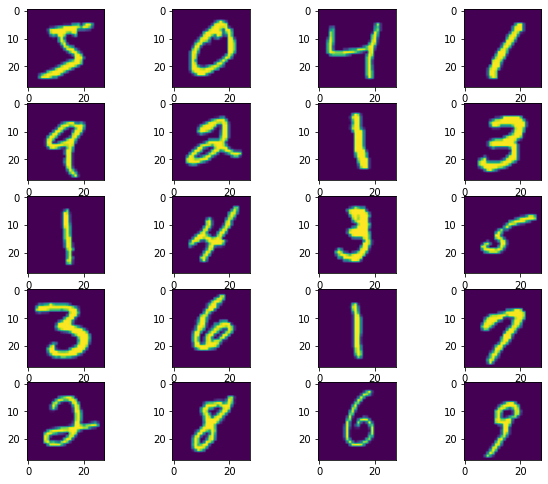

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
def show_image(data, num, cols):

    plt.figure(figsize=(10,10)) 
    for i, img in enumerate(data):
        if i == num:
            break
        image = Image.fromarray(img)
        plt.subplot(int(num/cols + 1), cols, i + 1)
        plt.imshow(image)
show_image(train_images, 20, 4)

In [ ]:
conv = Conv(8,3,3,1)
pool = MaxPool()
softmax = Softmax(13 * 13 * 8, 10)

def forward(image, label):
    # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
    # to work with. This is standard practice.
    
    out = conv.forward((image/255) - 0.5)
    out = pool.forward(out)
    out = softmax.forward(out)
    
    #calculate cross-entropy loss and accuracy
    loss = -np.log(out[label])
    acc = 1 if(np.argmax(out) == label) else 0
    
    return out, loss, acc


def train(im, label, lr=0.005):
    #forward
    out,loss,acc = forward(im, label)
    
    #calculate initial gradient
    gradient = np.zeros(10)
    gradient[label] = -1/out[label]
    
    
    #Backprop
    gradient = softmax.backprop(gradient, lr)
    gradient = pool.backprop(gradient)
    gradient = conv.backprop(gradient, lr)
    
    return loss, acc
    
    
print('MNIST CNN initialized')

for epoch in range(3):
    print('----EPOCH %d ---'%(epoch+1))
    
    #shuffle the training data
    permutation = np.random.permutation(len(train_images))
    train_images = train_images[permutation]
    train_labels = train_labels[permutation]


    loss = 0
    num_correct = 0

    for i, (im, label) in enumerate(zip(train_images, train_labels)):

        #print stats every 100 steps
        if(i>0 and i %100 == 99):
            print('[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%%' %(i + 1, loss / 100, num_correct))

            loss = 0
            num_correct = 0
        l, acc = train(im, label)
        loss += l
        num_correct += acc


MNIST CNN initialized
----EPOCH 1 ---
[Step 100] Past 100 steps: Average Loss 2.222 | Accuracy: 22%
[Step 200] Past 100 steps: Average Loss 2.119 | Accuracy: 32%
[Step 300] Past 100 steps: Average Loss 1.903 | Accuracy: 46%
[Step 400] Past 100 steps: Average Loss 1.597 | Accuracy: 57%
[Step 500] Past 100 steps: Average Loss 1.146 | Accuracy: 72%
[Step 600] Past 100 steps: Average Loss 0.955 | Accuracy: 72%
[Step 700] Past 100 steps: Average Loss 0.803 | Accuracy: 78%
[Step 800] Past 100 steps: Average Loss 0.828 | Accuracy: 76%
[Step 900] Past 100 steps: Average Loss 0.637 | Accuracy: 81%
[Step 1000] Past 100 steps: Average Loss 0.853 | Accuracy: 77%
----EPOCH 2 ---
[Step 100] Past 100 steps: Average Loss 0.606 | Accuracy: 81%
[Step 200] Past 100 steps: Average Loss 0.660 | Accuracy: 77%
[Step 300] Past 100 steps: Average Loss 0.458 | Accuracy: 87%
[Step 400] Past 100 steps: Average Loss 0.411 | Accuracy: 88%
[Step 500] Past 100 steps: Average Loss 0.421 | Accuracy: 88%
[Step 600] Past